In [152]:
import math
from typing import Sequence

import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt


# Подготовка данных <a name='preparing'></a>

Source: [book recommendation dataset](https://www.kaggle.com/datasets/arashnic/book-recommendation-dataset/data)

In [2]:
book = pd.read_csv('./Books.csv',low_memory=False)
rating = pd.read_csv('./Ratings.csv',low_memory=False)

df=book.merge(rating,how="left", on="ISBN")

df.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Book-Rating
0,0195153448,Classical Mythology,Mark P. O. Morford,2002.0,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,2.0,0.0
1,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,8.0,5.0
2,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11400.0,0.0
3,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11676.0,8.0
4,0060973129,Decision in Normandy,Carlo D'Este,1991.0,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,8.0,0.0


In [3]:
def fix_years(dataframe):
    dataframe['Year-Of-Publication'] = dataframe['Year-Of-Publication'].astype(str)
    
    for i in dataframe.index:
        book = dataframe.loc[i]
        if str(book['Year-Of-Publication']).endswith('.0'):
            book['Year-Of-Publication'] = book['Year-Of-Publication'][:-2]
        
        dataframe.loc[i] = book
            
    return dataframe

In [4]:
df = fix_years(df)

C:\Users\ipuzanov\AppData\Local\Temp\ipykernel_24348\861396345.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  book['Year-Of-Publication'] = book['Year-Of-Publication'][:-2]


In [64]:
columns = ['Book-Author', 'Book-Title', 'Book-Rating', 'User-ID', 'ISBN']

In [65]:
df[columns].to_csv('fixed-df.csv')

In [332]:
df = pd.read_csv('fixed-df.csv', index_col='Unnamed: 0')
df.head()

,Book-Author,Book-Title,Book-Rating,User-ID,ISBN
1,Richard Bruce Wright,Clara Callan,5.0,8,0002005018
3,Richard Bruce Wright,Clara Callan,8.0,11676,0002005018
5,Carlo D'Este,Decision in Normandy,8.0,2954,0060973129
9,Amy Tan,The Kitchen God's Wife,9.0,11676,0399135782
12,Scott Turow,PLEADING GUILTY,8.0,11676,0671870432


In [333]:
df.shape

(15131, 5)

In [334]:
df.info()
df.dropna(inplace=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15131 entries, 1 to 33085
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Book-Author  15131 non-null  object 
 1   Book-Title   15131 non-null  object 
 2   Book-Rating  15131 non-null  float64
 3   User-ID      15131 non-null  int64  
 4   ISBN         15131 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 709.3+ KB


In [335]:
df['User-ID'] = df['User-ID'].astype('int')
df["Book-Author"]=df["Book-Author"].astype("string")
df["Book-Author"]=df["Book-Author"].str.replace("DAN BROWN","Dan Brown")
df["Book-Author"]=df["Book-Author"].str.replace("Audrey Osofsky","Stephen King")
df["Book-Author"]=df["Book-Author"].str.replace("Dinah McCall","Stephen King")
# df.drop(columns=["Image-URL-S","Image-URL-M"],inplace=True)

In [336]:
df=df[df["Book-Rating"]>0]
df["Book-Rating"].describe()

count    15131.000000
mean         7.682043
std          1.810948
min          1.000000
25%          7.000000
50%          8.000000
75%          9.000000
max         10.000000
Name: Book-Rating, dtype: float64

In [337]:
df["User-ID"].nunique(), df["Book-Title"].nunique()

(4473, 5763)

In [338]:
df.groupby('User-ID')['Book-Title'].agg('count').sort_values()

User-ID
7769        1
11648       1
11652       1
11654       1
26238       1
         ... 
23902      90
6575      101
7346      110
16795     201
11676    1323
Name: Book-Title, Length: 4473, dtype: int64

In [339]:
book_counts = pd.DataFrame(df["Book-Title"].value_counts())
book_counts.sort_values("Book-Title", ascending=False)

,Book-Title
The Lovely Bones: A Novel,78
Wild Animus,54
The Nanny Diaries: A Novel,53
The Da Vinci Code,51
The Red Tent (Bestselling Backlist),42
...,...
Domestic Bliss : Simple Ways to Add Style to Your Life,1
Grace by the Cup: A Break from the Daily Grind,1
The Colloghi Conspiracy,1
Shadowrun: Nosferatu (Shadowrun (Roc)),1


In [340]:
rare_book = book_counts[book_counts["Book-Title"] <= 20].index

In [345]:
common_book = df[~df["Book-Title"].isin(rare_book)]
common_book

,Book-Author,Book-Title,Book-Rating,User-ID,ISBN
32,John Grisham,The Testament,8.0,3329,0440234743
36,John Grisham,The Testament,9.0,7346,0440234743
37,John Grisham,The Testament,8.0,7352,0440234743
38,John Grisham,The Testament,5.0,9419,0440234743
41,John Grisham,The Testament,6.0,11224,0440234743
...,...,...,...,...,...
32300,Annie Proulx,SHIPPING NEWS,7.0,7371,068419337X
32302,Annie Proulx,SHIPPING NEWS,3.0,11676,068419337X
32303,Annie Proulx,SHIPPING NEWS,8.0,20388,068419337X
33014,Gwynn Rubio,Icy Sparks,10.0,7841,067087311X


In [346]:
user_book_df = common_book.pivot_table(index=["User-ID"], columns=["Book-Title"], values="Book-Rating")
user_book_df

Book-Title,A Bend in the Road,A Heartbreaking Work of Staggering Genius,A Painted House,Angels &amp; Demons,Bridget Jones's Diary,Confessions of a Shopaholic (Summer Display Opportunity),Divine Secrets of the Ya-Ya Sisterhood: A Novel,Dreamcatcher,Fahrenheit 451,Girl with a Pearl Earring,...,The Summons,The Testament,Timeline,To Kill a Mockingbird,"Tuesdays with Morrie: An Old Man, a Young Man, and Life's Greatest Lesson",Where the Heart Is (Oprah's Book Club (Paperback)),White Oleander : A Novel,White Oleander : A Novel (Oprah's Book Club),Wicked: The Life and Times of the Wicked Witch of the West,Wild Animus
User-ID,,,,,,,,,,,,,,,,,,,,,
26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN
91,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
114,NaN,NaN,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
165,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
242,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278653,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
278663,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
278698,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [448]:
test_common_books = common_book.sample(n=1150)
test_user_book_df = test_common_books.pivot_table(index=["User-ID"], columns=["Book-Title"], values="Book-Rating")
test_user_book_df

Book-Title,A Bend in the Road,A Heartbreaking Work of Staggering Genius,A Painted House,Angels &amp; Demons,Bridget Jones's Diary,Confessions of a Shopaholic (Summer Display Opportunity),Divine Secrets of the Ya-Ya Sisterhood: A Novel,Dreamcatcher,Fahrenheit 451,Girl with a Pearl Earring,...,The Summons,The Testament,Timeline,To Kill a Mockingbird,"Tuesdays with Morrie: An Old Man, a Young Man, and Life's Greatest Lesson",Where the Heart Is (Oprah's Book Club (Paperback)),White Oleander : A Novel,White Oleander : A Novel (Oprah's Book Club),Wicked: The Life and Times of the Wicked Witch of the West,Wild Animus
User-ID,,,,,,,,,,,,,,,,,,,,,
91,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
242,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
243,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
244,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,NaN
254,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278552,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
278586,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
278633,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Меры сходства

### Косинусная мера

In [347]:
def get_cos_measure(a: Sequence, b: Sequence) -> float:    
    sum_a_square = sum_b_square = sum_vectors = 0
    for i in range(len(a)):
        sum_a_square += a[i] * a[i]
        sum_b_square += b[i] * b[i]
        sum_vectors += a[i] * b[i]
    
    return sum_vectors / (math.sqrt(sum_a_square) * math.sqrt(sum_b_square))

### Корреляция Пирсона

In [349]:
def get_pearson_measure(a: Sequence, b: Sequence) -> float:
    n = len(a)
    sum_a_square = sum_b_square = sum_vectors = a_average = b_average = 0
    for i in range(n):
        sum_a_square += a[i] * a[i]
        sum_b_square += b[i] * b[i]
        sum_vectors += a[i] * b[i]
        a_average += a[i]
        b_average += b[i]
    
    a_average /= n
    b_average /= n

    return (sum_vectors - n * a_average * b_average) / (
        math.sqrt(sum_a_square - (n * a_average * a_average)) 
        * math.sqrt(sum_b_square - (n * b_average * b_average))
    )

# Исследование

### Получаем активных пользователей

In [351]:
def get_active_users(dataframe, filter):
    active_users_list = []
    for user_id in dataframe.index:
        uniq = dataframe.loc[user_id].unique()
        if len(uniq) > filter:
            active_users_list.append(user_id)
    return active_users_list

In [352]:
active_users = get_active_users(user_book_df, 5)
active_users

[6251, 6563, 6575, 7125, 8454, 8801, 11224, 11676, 16795, 17950, 21014, 28177]

### Получаем популярные книги

In [353]:
def get_active_books(dataframe, filter):
    active_books_list = []
    for book_title in dataframe.loc[active_users].columns:
        uniq = dataframe.loc[active_users][book_title].unique()
        if len(uniq) > filter:
            active_books_list.append(book_title)
    return active_books_list

In [354]:
active_books = get_active_books(user_book_df, 4)
len(active_books), active_books

(8,
 ['Angels &amp; Demons',
  'House of Sand and Fog',
  'The Client',
  "The Girls' Guide to Hunting and Fishing",
  'The Nanny Diaries: A Novel',
  'The Reader',
  "Tuesdays with Morrie: An Old Man, a Young Man, and Life's Greatest Lesson",
  'White Oleander : A Novel'])

In [355]:
user_book_df.loc[active_users][active_books]

Book-Title,Angels &amp; Demons,House of Sand and Fog,The Client,The Girls' Guide to Hunting and Fishing,The Nanny Diaries: A Novel,The Reader,"Tuesdays with Morrie: An Old Man, a Young Man, and Life's Greatest Lesson",White Oleander : A Novel
User-ID,,,,,,,,
6251,NaN,6.0,NaN,NaN,NaN,NaN,7.0,8.0
6563,NaN,NaN,9.0,NaN,7.0,NaN,10.0,NaN
6575,NaN,NaN,NaN,8.0,NaN,NaN,6.0,NaN
7125,4.0,7.0,NaN,6.0,NaN,NaN,NaN,NaN
8454,NaN,NaN,NaN,7.0,NaN,NaN,NaN,6.0
8801,10.0,NaN,NaN,6.0,NaN,NaN,NaN,NaN
11224,7.0,7.0,7.0,6.0,NaN,NaN,NaN,NaN
11676,8.0,7.0,7.5,5.0,7.5,8.5,9.0,9.5
16795,NaN,9.0,5.0,NaN,9.0,5.0,NaN,8.5


In [356]:
active_ub_df = user_book_df.loc[active_users][active_books]

In [56]:
active_ub_df.to_csv('active-lab5.csv')

In [357]:
active_ub_df_filled = active_ub_df.fillna(0)
active_ub_df_filled

Book-Title,Angels &amp; Demons,House of Sand and Fog,The Client,The Girls' Guide to Hunting and Fishing,The Nanny Diaries: A Novel,The Reader,"Tuesdays with Morrie: An Old Man, a Young Man, and Life's Greatest Lesson",White Oleander : A Novel
User-ID,,,,,,,,
6251,0.0,6.0,0.0,0.0,0.0,0.0,7.0,8.0
6563,0.0,0.0,9.0,0.0,7.0,0.0,10.0,0.0
6575,0.0,0.0,0.0,8.0,0.0,0.0,6.0,0.0
7125,4.0,7.0,0.0,6.0,0.0,0.0,0.0,0.0
8454,0.0,0.0,0.0,7.0,0.0,0.0,0.0,6.0
8801,10.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0
11224,7.0,7.0,7.0,6.0,0.0,0.0,0.0,0.0
11676,8.0,7.0,7.5,5.0,7.5,8.5,9.0,9.5
16795,0.0,9.0,5.0,0.0,9.0,5.0,0.0,8.5


### Получение словарей расстояний между пользователями и между объектами

In [358]:
def norm(value):
    return (value + 1) / 2

def normalization(values):
    return [norm(value) for value in values]

In [359]:
def get_users_destination(dataframe, users = active_users) -> dict:
    users_destination = {}
    for user_id in users:
        user_scores = dataframe.loc[user_id].values
        user_dest = dataframe.apply(lambda raw: get_pearson_measure(user_scores, raw.values), axis= 1)
        users_destination[user_id] = normalization(user_dest.values)
    return users_destination

In [360]:
def get_books_destination(dataframe, books = active_books) -> dict:
    books_destination = {}
    for book_title in books:
        book_scores = dataframe[book_title].values
        book_dest = dataframe.apply(lambda raw: get_cos_measure(book_scores, raw.values), axis=0)
        books_destination[book_title] = normalization(book_dest.values)
    return books_destination

### Константы

In [418]:
k = 0.8
l = 0.2

In [419]:
users_dest = get_users_destination(active_ub_df_filled, active_users)
books_dest = get_books_destination(active_ub_df_filled, active_books)

### Заполняем матрицу оценок

In [420]:
predicted_df = active_ub_df_filled.copy()
new_values = []
not_none_elements = 0
for user_id in active_users:
    M = sum(active_ub_df_filled.loc[user_id] != 0)
    for book_id in active_books:
        N = sum(active_ub_df_filled[book_id] != 0)
        if predicted_df.loc[user_id, book_id] == 0:
            user_value = k / N * sum(active_ub_df_filled[book_id] * users_dest[user_id])
            book_value = l / M * sum(active_ub_df_filled.loc[user_id] * books_dest[book_id])
            new_value = round(user_value + book_value, 1)
            new_values.append(new_value)
            predicted_df.loc[user_id, book_id] = new_value
        else:
            not_none_elements += 1

In [421]:
not_none_elements

42

In [422]:
np.concatenate([np.unique(new_values)[:5], np.unique(new_values)[-5:]])

array([2.3, 2.4, 2.5, 2.7, 2.8, 4.1, 4.2, 4.3, 4.6, 4.9])

In [423]:
predicted_df

Book-Title,Angels &amp; Demons,House of Sand and Fog,The Client,The Girls' Guide to Hunting and Fishing,The Nanny Diaries: A Novel,The Reader,"Tuesdays with Morrie: An Old Man, a Young Man, and Life's Greatest Lesson",White Oleander : A Novel
User-ID,,,,,,,,
6251,3.6,6.0,4.1,3.5,4.9,4.2,7.0,8.0
6563,3.4,4.3,9.0,3.1,7.0,3.9,10.0,4.2
6575,3.9,3.6,3.4,8.0,3.5,2.7,6.0,3.8
7125,4.0,7.0,2.8,6.0,3.0,2.5,3.1,3.4
8454,3.9,3.6,2.9,7.0,3.6,3.0,3.4,6.0
8801,10.0,3.6,3.2,6.0,2.8,2.4,3.2,3.3
11224,7.0,7.0,7.0,6.0,2.9,2.3,3.3,3.0
11676,8.0,7.0,7.5,5.0,7.5,8.5,9.0,9.5
16795,3.2,9.0,5.0,3.1,9.0,5.0,4.3,8.5


Text(0.5, 1.0, 'Заполненная матрица оценок')

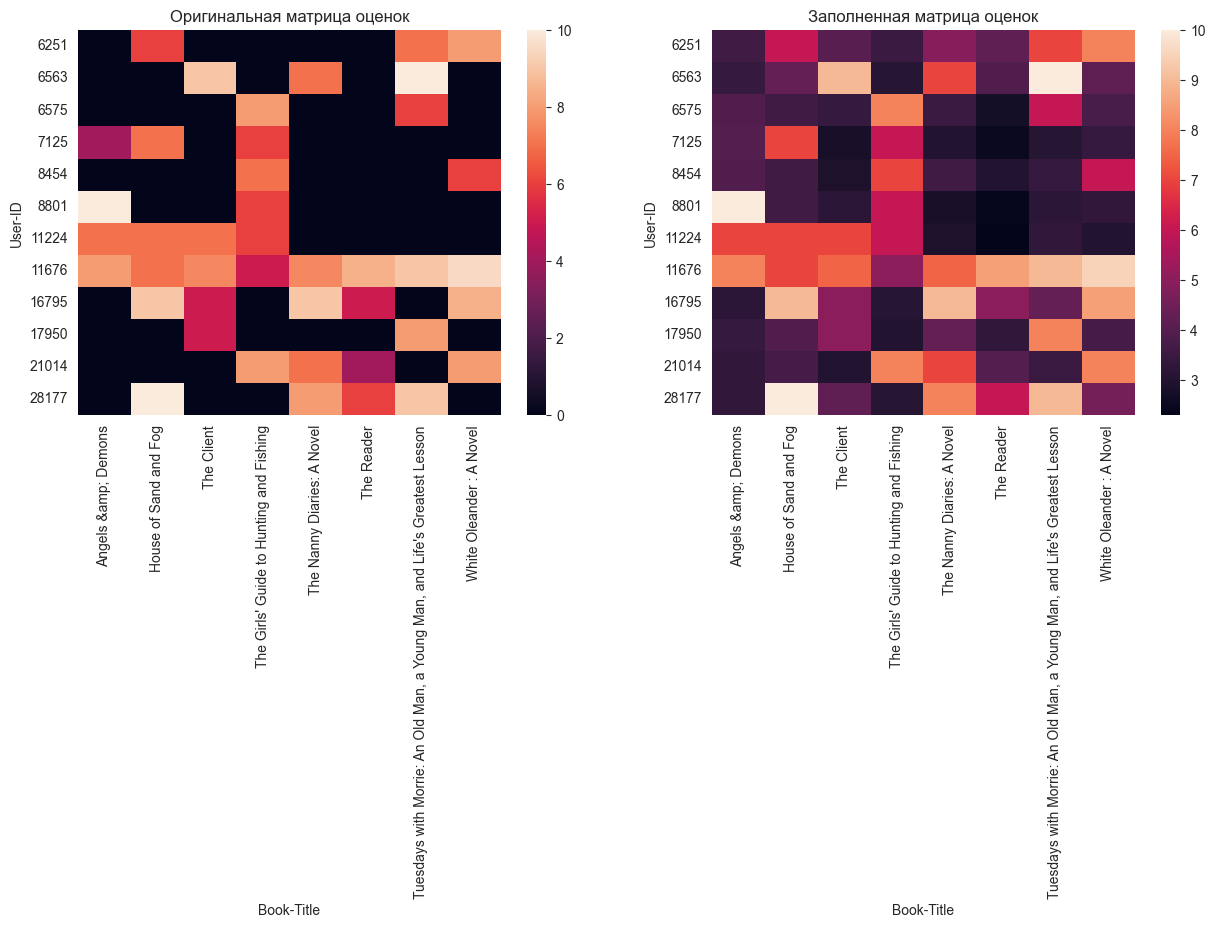

In [424]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.heatmap(active_ub_df_filled, ax=axes[0]) 
axes[0].set_title('Оригинальная матрица оценок')
sns.heatmap(predicted_df, ax=axes[1]) 
axes[1].set_title('Заполненная матрица оценок')

In [385]:
predicted_df.to_csv('result-matrix.csv')

In [386]:
predicted_df = pd.read_csv('result-matrix.csv', index_col='User-ID')
predicted_df

,Angels &amp; Demons,House of Sand and Fog,The Client,The Girls' Guide to Hunting and Fishing,The Nanny Diaries: A Novel,The Reader,"Tuesdays with Morrie: An Old Man, a Young Man, and Life's Greatest Lesson",White Oleander : A Novel
User-ID,,,,,,,,
6251,3.7,6.0,4.2,3.7,5.0,4.4,7.0,8.0
6563,3.7,4.6,9.0,3.4,7.0,4.3,10.0,4.4
6575,4.0,3.7,3.6,8.0,3.7,3.0,6.0,4.0
7125,4.0,7.0,3.0,6.0,3.1,2.7,3.2,3.5
8454,4.0,3.7,3.1,7.0,3.7,3.2,3.5,6.0
8801,10.0,3.9,3.5,6.0,3.1,2.8,3.4,3.6
11224,7.0,7.0,7.0,6.0,3.2,2.6,3.5,3.3
11676,8.0,7.0,7.5,5.0,7.5,8.5,9.0,9.5
16795,3.4,9.0,5.0,3.3,9.0,5.0,4.4,8.5


## Тест

In [449]:
test_active_ub_df = test_user_book_df.loc[active_users][active_books]
test_active_ub_df

Book-Title,Angels &amp; Demons,House of Sand and Fog,The Client,The Girls' Guide to Hunting and Fishing,The Nanny Diaries: A Novel,The Reader,"Tuesdays with Morrie: An Old Man, a Young Man, and Life's Greatest Lesson",White Oleander : A Novel
User-ID,,,,,,,,
6251,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN
6563,NaN,NaN,9.0,NaN,7.0,NaN,10.0,NaN
6575,NaN,NaN,NaN,NaN,NaN,NaN,6.0,NaN
7125,4.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN
8454,NaN,NaN,NaN,7.0,NaN,NaN,NaN,6.0
8801,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11224,7.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN
11676,NaN,7.0,7.5,5.0,9.0,8.5,9.0,9.0
16795,NaN,9.0,5.0,NaN,NaN,5.0,NaN,8.5


In [450]:
test_active_ub_df_filled = test_active_ub_df.fillna(0)
test_active_ub_df_filled

Book-Title,Angels &amp; Demons,House of Sand and Fog,The Client,The Girls' Guide to Hunting and Fishing,The Nanny Diaries: A Novel,The Reader,"Tuesdays with Morrie: An Old Man, a Young Man, and Life's Greatest Lesson",White Oleander : A Novel
User-ID,,,,,,,,
6251,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0
6563,0.0,0.0,9.0,0.0,7.0,0.0,10.0,0.0
6575,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0
7125,4.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0
8454,0.0,0.0,0.0,7.0,0.0,0.0,0.0,6.0
8801,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11224,7.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0
11676,0.0,7.0,7.5,5.0,9.0,8.5,9.0,9.0
16795,0.0,9.0,5.0,0.0,0.0,5.0,0.0,8.5


In [451]:
test_users_dest = get_users_destination(test_active_ub_df_filled, active_users)
test_books_dest = get_books_destination(test_active_ub_df_filled, active_books)

In [452]:
updated_predicted_df = test_active_ub_df_filled.copy()
new_values = []
test_not_none_elements = 0
for user_id in active_users:
    M = sum(test_active_ub_df_filled.loc[user_id] != 0)
    for book_id in active_books:
        N = sum(test_active_ub_df_filled[book_id] != 0)
        if test_active_ub_df_filled.loc[user_id, book_id] == 0:
            user_value = k / N * sum(test_active_ub_df_filled[book_id] * test_users_dest[user_id])
            book_value = l / M * sum(test_active_ub_df_filled.loc[user_id] * test_books_dest[book_id])
            new_value = round(user_value + book_value, 1)
            new_values.append(new_value)
            updated_predicted_df.loc[user_id, book_id] = new_value
        else:
            test_not_none_elements += 1

In [453]:
test_not_none_elements

31

In [454]:
updated_predicted_df

Book-Title,Angels &amp; Demons,House of Sand and Fog,The Client,The Girls' Guide to Hunting and Fishing,The Nanny Diaries: A Novel,The Reader,"Tuesdays with Morrie: An Old Man, a Young Man, and Life's Greatest Lesson",White Oleander : A Novel
User-ID,,,,,,,,
6251,4.5,6.0,3.8,2.9,4.4,3.9,4.2,4.2
6563,2.6,4.0,9.0,3.0,7.0,3.9,10.0,3.7
6575,2.9,3.9,4.6,3.1,5.7,3.5,6.0,3.5
7125,4.0,7.0,2.8,2.2,3.3,2.9,3.4,3.2
8454,2.7,3.2,3.3,7.0,3.0,3.5,3.2,6.0
8801,10.0,3.9,2.4,2.6,2.5,2.1,3.1,2.7
11224,7.0,7.0,2.6,2.2,3.0,2.7,3.2,3.0
11676,1.6,7.0,7.5,5.0,9.0,8.5,9.0,9.0
16795,3.4,9.0,5.0,4.2,4.4,5.0,4.0,8.5


Text(0.5, 1.0, 'Уменьшенная заполненная матрица оценок')

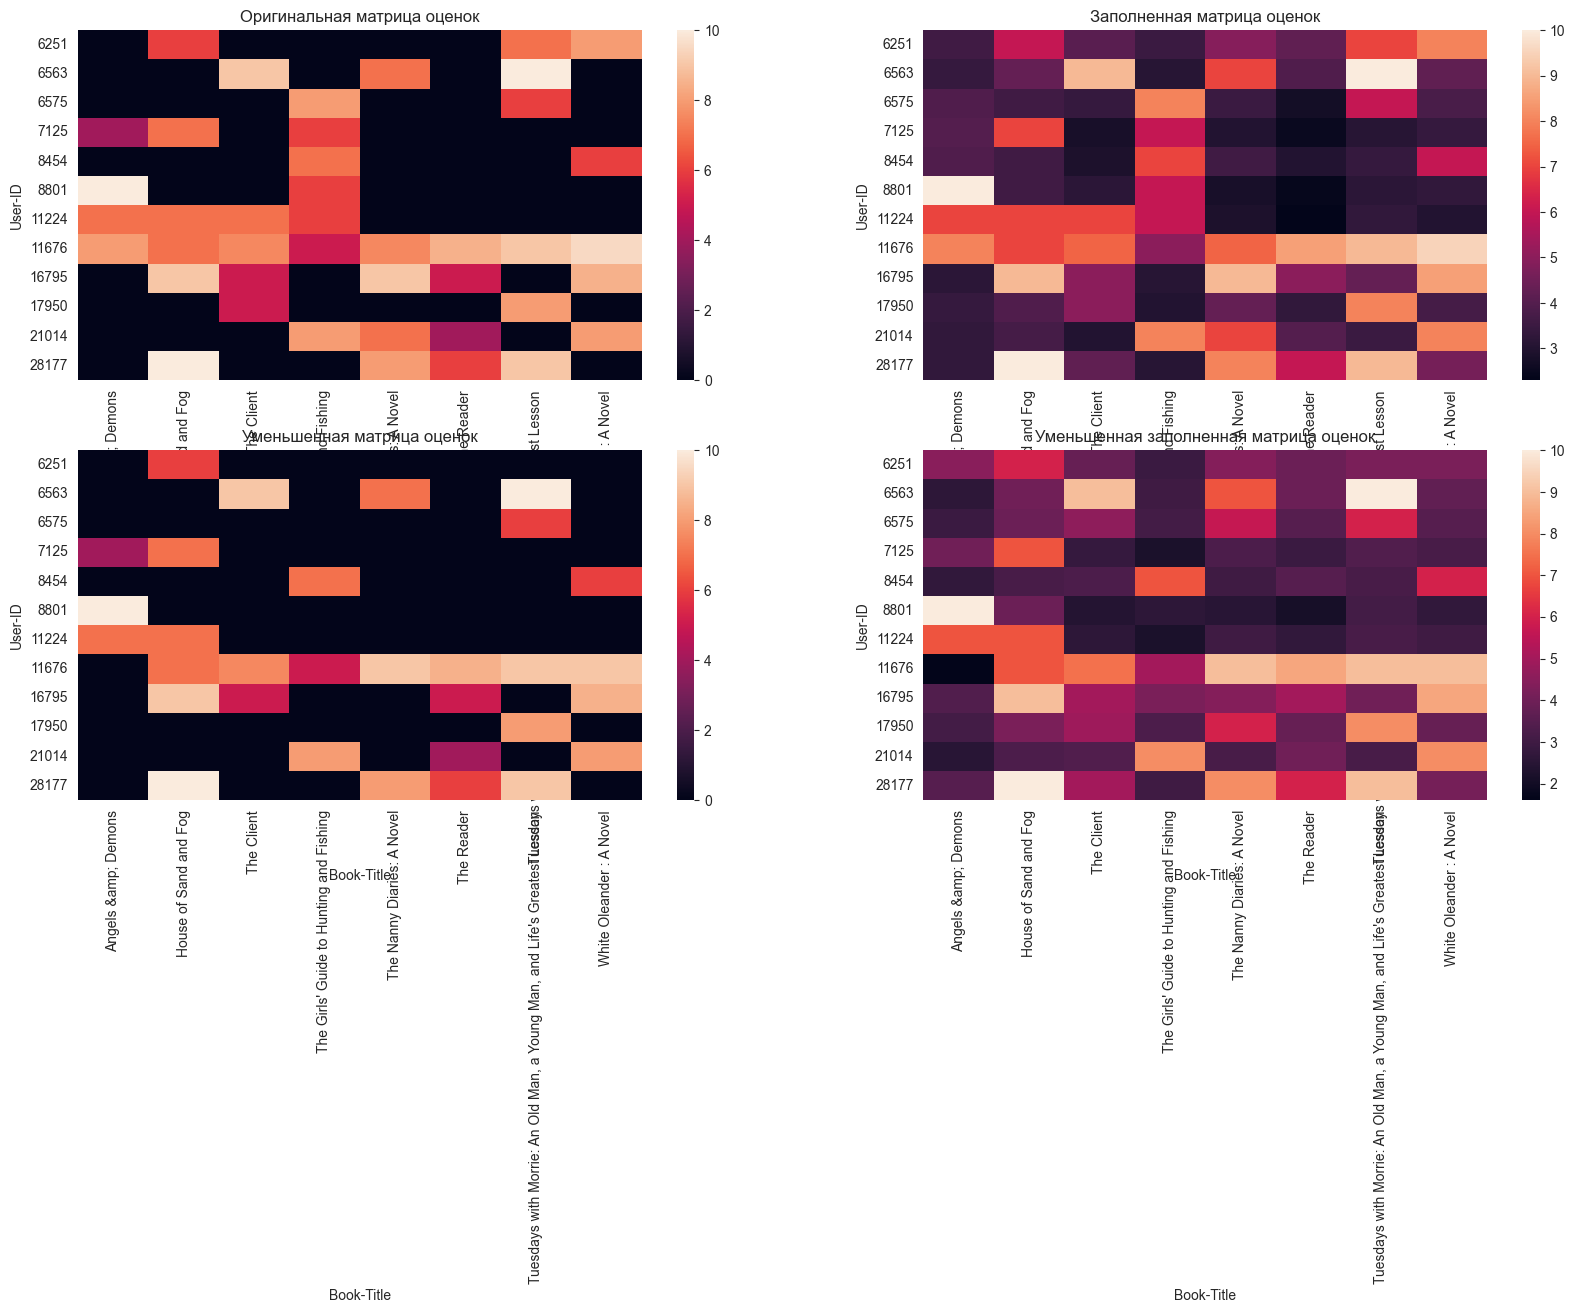

In [466]:
fig, axes = plt.subplots(2, 2, figsize=(20, 10))

sns.heatmap(active_ub_df_filled, ax=axes[0][0]) 
axes[0][0].set_title('Оригинальная матрица оценок')
sns.heatmap(predicted_df, ax=axes[0][1]) 
axes[0][1].set_title('Заполненная матрица оценок')
sns.heatmap(test_active_ub_df_filled, ax=axes[1][0]) 
axes[1][0].set_title('Уменьшенная матрица оценок')
sns.heatmap(updated_predicted_df, ax=axes[1][1]) 
axes[1][1].set_title('Уменьшенная заполненная матрица оценок')